In [1]:
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
cd meas_30sek

/home/krys/POLIBUDA/PomiarTemperaturyBarwowej/Measurements/meas_30sek


In [3]:
ls

Bellight_4W_3000K.npy    ModelParams.npy
Bellight_6W_4000K.npy    Philips_3_5W_2700K.npy
Bellight_6W_6500K.npy    Philips_4_6W_4000K.npy
Halogen_35W.npy          Swiatlo_dzienne_Niemcewicza_wieczor.npy
KingFisher_3W_2700K.npy  Untable_Unknown_ALittleWarm.npy


In [4]:
all_meas = []

dzienne = np.load("Swiatlo_dzienne_Niemcewicza_wieczor.npy")
P_2700K = np.load("Philips_3_5W_2700K.npy")
P_4000K = np.load("Philips_4_6W_4000K.npy")
B_3000K = np.load("Bellight_4W_3000K.npy")
B_4000K = np.load("Bellight_6W_4000K.npy")
B_6500K = np.load("Bellight_6W_6500K.npy")
K_2700K = np.load("KingFisher_3W_2700K.npy")
Halogen = np.load("Halogen_35W.npy")

all_meas.append(dzienne)
all_meas.append(P_2700K)
all_meas.append(P_4000K)
all_meas.append(B_3000K)
all_meas.append(B_4000K)
all_meas.append(B_6500K)
all_meas.append(K_2700K)
all_meas.append(Halogen)

In [5]:
B_6500K

array([[525, 618, 611],
       [527, 620, 612],
       [528, 620, 613],
       [528, 622, 614],
       [530, 622, 615],
       [531, 624, 615],
       [531, 625, 616],
       [532, 625, 616],
       [533, 626, 616],
       [534, 626, 617],
       [534, 628, 617],
       [535, 629, 618],
       [536, 631, 618],
       [537, 631, 619],
       [538, 632, 620],
       [538, 633, 621],
       [539, 634, 621],
       [541, 635, 622],
       [540, 635, 621],
       [542, 636, 623],
       [542, 637, 623],
       [543, 638, 623],
       [543, 638, 623],
       [544, 638, 624],
       [545, 639, 624],
       [545, 640, 625],
       [546, 641, 625],
       [546, 642, 626],
       [547, 643, 626],
       [547, 644, 627]])

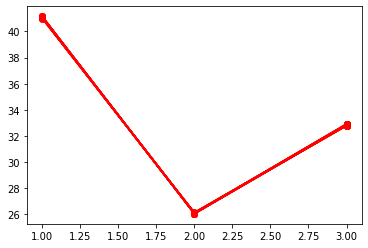

In [7]:
def normalize(rgb_t):
    rgb_t_np = np.asarray(rgb_t)
    return rgb_t_np/sum(rgb_t_np)

def invertData(rgb_t):
    inv_rgb_t = 1/rgb_t
    return normalize(inv_rgb_t)

def plotErr(numpy_RGB_raw, colortype):
    for i in range(len(numpy_RGB_raw)):
        inRGB = 100*invertData(numpy_RGB_raw[i])
        plt.plot([1,2,3],inRGB, colortype)
    
plotErr(dzienne, 'o-r')

Wnioski:

Dla stabilnego źródła ilość pomiarów nie wpływa znacząco na wynik. Mierzone okresy delikatnie się zwiększają wraz z upływem czasu, ich stosunek pozostaje niezmienny. 

Możliwe, że koniecznym będzie sprawdzanie stabilności źródła poprzez badanie zmiany stosunku na przestrzeni kilku pomiarów. 

In [10]:
def scale_plot_size(factor=1.5):
    default_dpi = matplotlib.rcParamsDefault['figure.dpi']
    matplotlib.rcParams['figure.dpi'] = default_dpi*factor

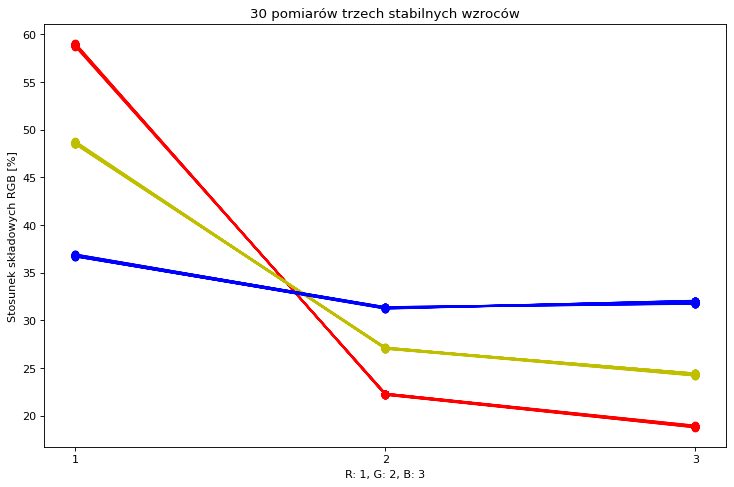

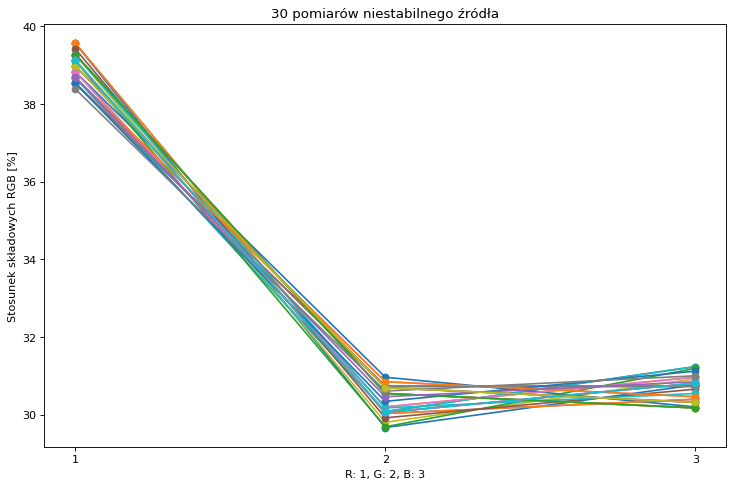

In [22]:
plt.figure(1,figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.axes(title='30 pomiarów trzech stabilnych wzroców', 
         ylabel='Stosunek składowych RGB [%]', xlabel='R: 1, G: 2, B: 3')
plt.xticks([1,2,3])

# Czerwone linie reprezentują pomiary wzorca 2700K
plotErr(all_meas[1], '-or')
# Żółte linie reprezentują pomiary wzorca 4000K
plotErr(all_meas[2], '-oy')
# Niebieskie linie reprezentują pomiary wzorca 6500K
plotErr(all_meas[5], '-ob')

plt.figure(2,figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.axes(title='30 pomiarów niestabilnego źródła', ylabel='Stosunek składowych RGB [%]', xlabel='R: 1, G: 2, B: 3')
plt.xticks([1,2,3])
plotErr(all_meas[7], '-o')

In [12]:
all_meas_Inv_Norm = []
for meas in all_meas:
    meas_Inv_Norm = []
    for current_meas in meas:
        meas_Inv_Norm.append(invertData(current_meas))
    all_meas_Inv_Norm.append(meas_Inv_Norm)
    
all_meas[1][1]
all_meas_Inv_Norm[1][1]

array([0.59063503, 0.2217153 , 0.18764967])

Macierz uśrednionych parametrów: 
 [0.5888908  0.22250966 0.18859955] 
 [0.48596954 0.27077474 0.24325572] 
 [0.36786877 0.31303272 0.31909851] 

Wyliczone współczynniki modelu: 
 [  -209.77259715 -28372.350226    48444.73482132]


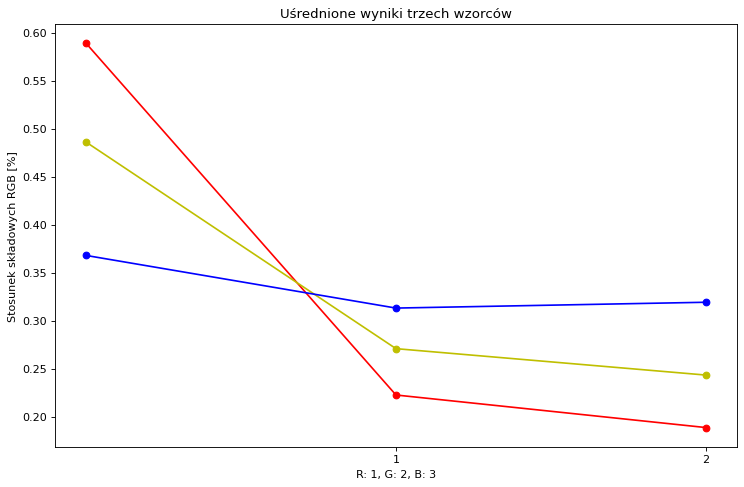

In [21]:
from numpy.linalg import solve

av_2700K = sum(all_meas_Inv_Norm[1])/len(all_meas_Inv_Norm[1])
av_4000K = sum(all_meas_Inv_Norm[2])/len(all_meas_Inv_Norm[2])
av_6500K = sum(all_meas_Inv_Norm[5])/len(all_meas_Inv_Norm[5])
print("Macierz uśrednionych parametrów: \n", av_2700K, "\n", av_4000K, "\n", av_6500K, "\n")
av_macierz = [av_2700K, av_4000K, av_6500K]

plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.axes(title='Uśrednione wyniki trzech wzorców', ylabel='Stosunek składowych RGB [%]', xlabel='R: 1, G: 2, B: 3')
plt.xticks([1,2,3])
plt.plot(av_2700K, '-or')
plt.plot(av_4000K, '-oy')
plt.plot(av_6500K, '-ob')

av_macierzN = np.asarray(av_macierz)
av_wsp = solve(av_macierzN, [2700, 4000, 6500])
print("Wyliczone współczynniki modelu: \n", av_wsp)

In [14]:
def colorTempEstimation3(RGB_meas, wsp):
    estym = ((wsp[0]*RGB_meas[0])+(wsp[1]*RGB_meas[1])+(wsp[2]*RGB_meas[2]))
    return round(estym)

Tab = []
for i in range(1,len(all_meas_Inv_Norm)-1):
    CT_tab = []
    
    for current in all_meas_Inv_Norm[i]:
        CT_tab.append(colorTempEstimation3(current, av_wsp))
        
    Tab.append(CT_tab)



In [15]:
print("Wartości nominalne:")
print("2700K", " ", " 4000K", " ", " 3000K", " ", " 4000K", " ",
    " 6500K", " "," 2700K\n")
print("Zmierzone wartości:")
for i in range(len(Tab[0])):
    print(Tab[0][i]," ", Tab[1][i]," ", Tab[2][i]," ",
          Tab[3][i]," ", Tab[4][i]," ", Tab[5][i])
    
def calcVar(tab):
    average = calcAve(tab)
    tab = np.asarray(tab)
    return round(np.sqrt(np.var(tab)))

def calcAve(tab):
    tab = np.asarray(tab)
    return round(np.average(tab))
    
print("\nWyliczone średnie: ")
print(calcAve(Tab[0])," ", calcAve(Tab[1])," ", calcAve(Tab[2])," ",
          calcAve(Tab[3][i])," ", calcAve(Tab[4][i])," ", calcAve(Tab[5]))

print("\nOdchylenie standardowe: ")
print(calcVar(Tab[0]),"   ", calcVar(Tab[1]),"   ", calcVar(Tab[2]),"   ",
          calcVar(Tab[3]),"   ", calcVar(Tab[4]),"   ", calcVar(Tab[5]))


Wartości nominalne:
2700K    4000K    3000K    4000K    6500K    2700K

Zmierzone wartości:
2655.0   3926.0   2859.0   3886.0   6392.0   3081.0
2676.0   3926.0   2862.0   3890.0   6414.0   3132.0
2689.0   3923.0   2859.0   3907.0   6397.0   3122.0
2689.0   3960.0   2858.0   3924.0   6411.0   3148.0
2710.0   3935.0   2871.0   3928.0   6398.0   3119.0
2667.0   3972.0   2864.0   3940.0   6438.0   3115.0
2702.0   3972.0   2877.0   3944.0   6433.0   3134.0
2679.0   3972.0   2870.0   3934.0   6438.0   3130.0
2700.0   4025.0   2879.0   3946.0   6460.0   3130.0
2699.0   4025.0   2879.0   3956.0   6443.0   3127.0
2699.0   3984.0   2888.0   3960.0   6478.0   3170.0
2677.0   3984.0   2891.0   3963.0   6478.0   3142.0
2712.0   4021.0   2897.0   3961.0   6517.0   3142.0
2690.0   3995.0   2887.0   3974.0   6500.0   3142.0
2710.0   3995.0   2890.0   3979.0   6501.0   3138.0
2710.0   3980.0   2900.0   3991.0   6496.0   3156.0
2710.0   3991.0   2893.0   3982.0   6518.0   3153.0
2688.0   4033.0   2890.0